<a href="https://colab.research.google.com/github/devijavvadi5/Glaucoma-Segmentation/blob/main/Copy_of_colabDristi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!unzip '/content/drive/MyDrive/cmis dristi.zip'

Archive:  /content/drive/MyDrive/cmis dristi.zip
   creating: cmis dristi/
   creating: cmis dristi/Drishti-GS1_files/
  inflating: cmis dristi/Drishti-GS1_files/Drishti-GS1_diagnosis.xlsx  
   creating: cmis dristi/Drishti-GS1_files/Drishti-GS1_files/
   creating: cmis dristi/Drishti-GS1_files/Drishti-GS1_files/Test/
   creating: cmis dristi/Drishti-GS1_files/Drishti-GS1_files/Test/Images/
  inflating: cmis dristi/Drishti-GS1_files/Drishti-GS1_files/Test/Images/drishtiGS_001.png  
  inflating: cmis dristi/Drishti-GS1_files/Drishti-GS1_files/Test/Images/drishtiGS_003.png  
  inflating: cmis dristi/Drishti-GS1_files/Drishti-GS1_files/Test/Images/drishtiGS_005.png  
  inflating: cmis dristi/Drishti-GS1_files/Drishti-GS1_files/Test/Images/drishtiGS_006.png  
  inflating: cmis dristi/Drishti-GS1_files/Drishti-GS1_files/Test/Images/drishtiGS_007.png  
  inflating: cmis dristi/Drishti-GS1_files/Drishti-GS1_files/Test/Images/drishtiGS_009.png  
  inflating: cmis dristi/Drishti-GS1_files/Drish

In [3]:
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pylab as plt
from PIL import Image

In [4]:
image=np.array(Image.open('/content/cmis dristi/Drishti-GS1_files/Drishti-GS1_files/Training/Images/drishtiGS_002.png'))

In [5]:
image.shape

(1752, 2045, 3)

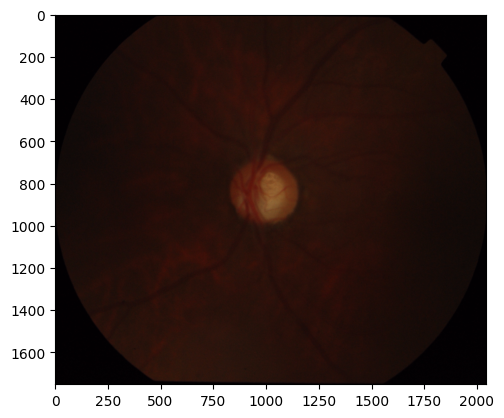

In [6]:
plt.imshow(image)

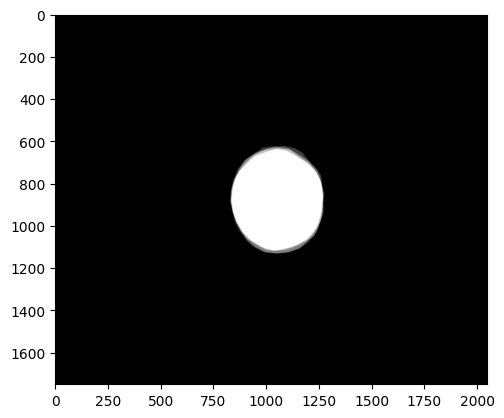

In [7]:
discfull = np.array(Image.open("/content/cmis dristi/Drishti-GS1_files/Drishti-GS1_files/Test/Test_GT/drishtiGS_001/SoftMap/drishtiGS_001_ODsegSoftmap.png"))
plt.imshow(discfull,cmap='gray')
plt.show()

In [8]:
np.unique(discfull)

array([  0,  64, 128, 191, 255], dtype=uint8)

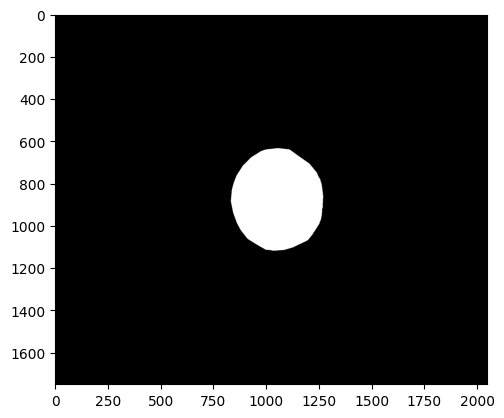

In [9]:
th=128
disc = np.array((discfull > th), dtype = np.uint8)
plt.imshow(disc,cmap='gray')
plt.show()

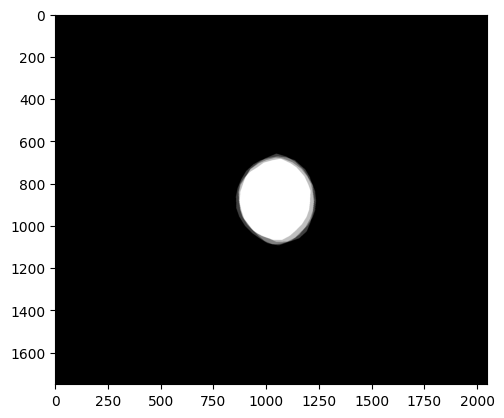

In [10]:

cupfull=np.array(Image.open("/content/cmis dristi/Drishti-GS1_files/Drishti-GS1_files/Test/Test_GT/drishtiGS_001/SoftMap/drishtiGS_001_cupsegSoftmap.png"))
plt.imshow(cupfull,cmap='gray')
plt.show()

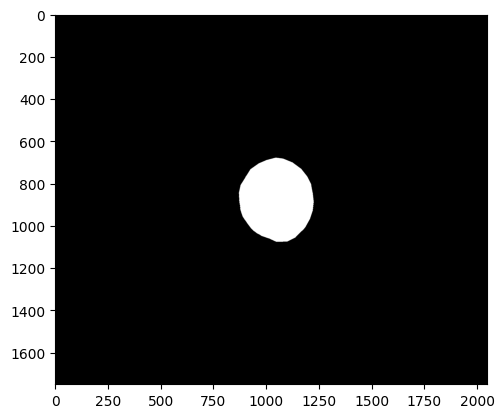

In [11]:
th=128
cup = np.array((cupfull > th), dtype = np.uint8)
plt.imshow(cup,cmap='gray')
plt.show()

In [12]:
np.unique(cup)

array([0, 1], dtype=uint8)

In [13]:
newdisc=disc-cup

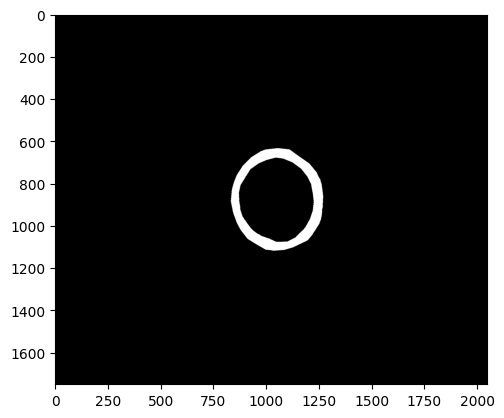

In [14]:
plt.imshow(newdisc,cmap='gray')
plt.show()

In [15]:
np.unique(newdisc)

array([0, 1], dtype=uint8)

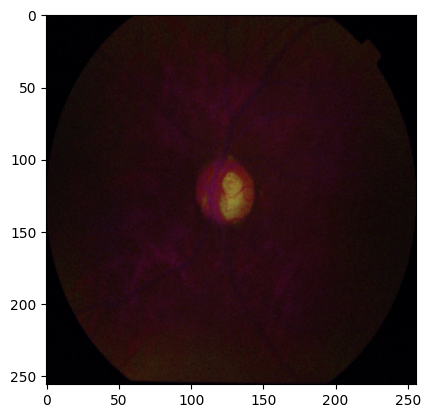

In [16]:
  img = np.array(Image.open("/content/cmis dristi/Drishti-GS1_files/Drishti-GS1_files/Training/Images/drishtiGS_002.png"))
  img=cv2.resize(img,(256,256))
  b,g,r=cv2.split(img)
  lab_img=cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
  h,s,v=cv2.split(lab_img)

  clahe=cv2.createCLAHE(clipLimit=3.0,tileGridSize=(8,8))
  cl=clahe.apply(h)
  _img=cv2.merge((cl,s,v))
  img2=cv2.cvtColor(_img,cv2.COLOR_HSV2BGR)
  plt.imshow(img2)

In [17]:
os.mkdir('dataset')
os.mkdir('dataset/trainimages')
os.mkdir('dataset/trainimages/train')
os.mkdir('dataset/trainmasks')
os.mkdir('dataset/trainmasks/train/')

In [18]:
folders=sorted(os.listdir("/content/cmis dristi/Drishti-GS1_files/Drishti-GS1_files/Training/Images/"))
# from keras.preprocessing.image import save_img
for folder in folders:
  img=np.array(Image.open("/content/cmis dristi/Drishti-GS1_files/Drishti-GS1_files/Training/Images/"+folder))
  img=cv2.resize(img,(256,256))
  b,g,r=cv2.split(img)
  lab_img=cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
  h,s,v=cv2.split(lab_img)

  clahe=cv2.createCLAHE(clipLimit=3.0,tileGridSize=(8,8))
  cl=clahe.apply(h)
  _img=cv2.merge((cl,s,v))
  img2=cv2.cvtColor(_img,cv2.COLOR_HSV2BGR)
  img_dst = os.path.join('dataset/trainimages', 'train/')
  im = Image.fromarray(img)
  im.save(img_dst+folder)

In [19]:
import os
from PIL import Image, ImageOps
import numpy as np
import cv2
import tensorflow as tf

folders1 = sorted(os.listdir("/content/cmis dristi/Drishti-GS1_files/Drishti-GS1_files/Training/GT"))
for folder in folders1:
    # Skip hidden folders like '.ipynb_checkpoints'
    if folder.startswith('N'):
        continue
    th = 127
    mask1_src = os.path.join('/content/cmis dristi/Drishti-GS1_files/Drishti-GS1_files/Training/GT/', folder, 'SoftMap', folder + '_ODsegSoftmap.png')
    mask2_src = os.path.join('/content/cmis dristi/Drishti-GS1_files/Drishti-GS1_files/Training/GT/', folder, 'SoftMap', folder + '_cupsegSoftmap.png')

    mask1 = np.array(ImageOps.grayscale(Image.open(mask1_src)))
    mask1 = np.array((mask1 > th), dtype=np.uint8)
    mask1 = cv2.resize(mask1, (256, 256))
    mask2 = np.array(ImageOps.grayscale(Image.open(mask2_src)))
    mask2 = np.array((mask2 > th), dtype=np.uint8)
    mask2 = cv2.resize(mask2, (256, 256))
    # mask11=mask1-mask2
    final_mask = np.dstack([mask1, mask2, mask1 - mask2])

    mask_dst = os.path.join('dataset/trainmasks', 'train/')

    # mask = np.expand_dims(mask, -1)
    tf.keras.utils.save_img(mask_dst + folder + '.png', final_mask, scale=False)

In [20]:
os.mkdir('dataset/testimages')
os.mkdir('dataset/testimages/test')
os.mkdir('dataset/testmasks')
os.mkdir('dataset/testmasks/test/')

In [21]:

folders=sorted(os.listdir("/content/cmis dristi/Drishti-GS1_files/Drishti-GS1_files/Test/Images/"))


# from keras.preprocessing.image import save_img
for folder in folders:
  img=np.array(Image.open("/content/cmis dristi/Drishti-GS1_files/Drishti-GS1_files/Test/Images/"+folder))
  img=cv2.resize(img,(256,256))
  b,g,r=cv2.split(img)
  lab_img=cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
  h,s,v=cv2.split(lab_img)

  clahe=cv2.createCLAHE(clipLimit=3.0,tileGridSize=(8,8))
  cl=clahe.apply(h)
  _img=cv2.merge((cl,s,v))
  img2=cv2.cvtColor(_img,cv2.COLOR_HSV2BGR)
  img_dst = os.path.join('dataset/testimages', 'test/')
  im = Image.fromarray(img)
  im.save(img_dst+folder)


In [22]:
folders1=sorted(os.listdir("/content/cmis dristi/Drishti-GS1_files/Drishti-GS1_files/Test/Test_GT/"))
for folder in folders1:
  th = 127
  mask1_src = os.path.join('/content/cmis dristi/Drishti-GS1_files/Drishti-GS1_files/Test/Test_GT/' + folder+'/SoftMap/'+folder+'_ODsegSoftmap.png')
  mask2_src = os.path.join('/content/cmis dristi/Drishti-GS1_files/Drishti-GS1_files/Test/Test_GT/' + folder+'/SoftMap/'+folder+'_cupsegSoftmap.png')
  mask1 = np.array(ImageOps.grayscale(Image.open(mask1_src)))
  mask1 = np.array((mask1 > th), dtype = np.uint8)
  mask1=cv2.resize(mask1,(256,256))
  mask2 = np.array(ImageOps.grayscale(Image.open(mask2_src)))
  mask2 = np.array((mask2 > th), dtype = np.uint8)
  mask2=cv2.resize(mask2,(256,256))
  # mask11=mask1-mask2
  final_mask = np.dstack([mask1, mask2,mask1-mask2])

  mask_dst = os.path.join('dataset/testmasks', 'test/')
  # img_dst1 = os.path.join('dataset/testimages', 'test/')
  # mask_dst1 = os.path.join('dataset/testmasks', 'test/')

  # mask = np.expand_dims(mask, -1)
  tf.keras.utils.save_img(mask_dst+folder+'.png', final_mask,scale = False )

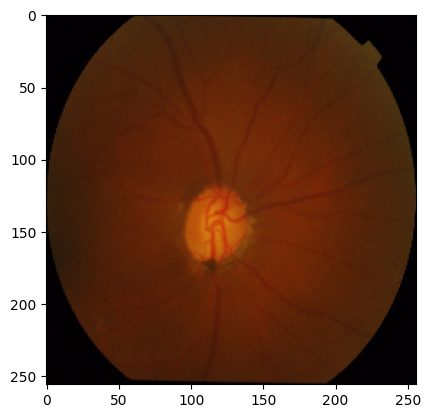

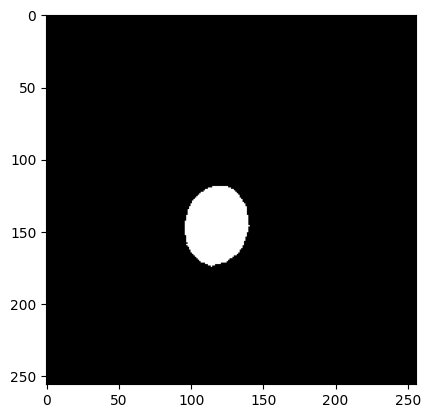

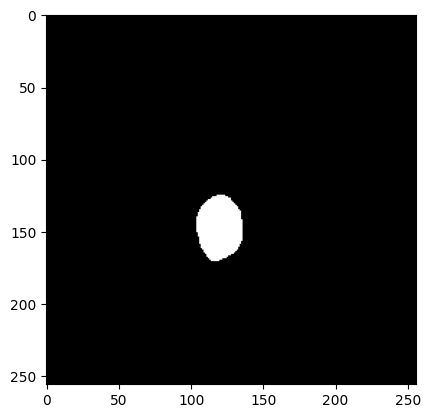

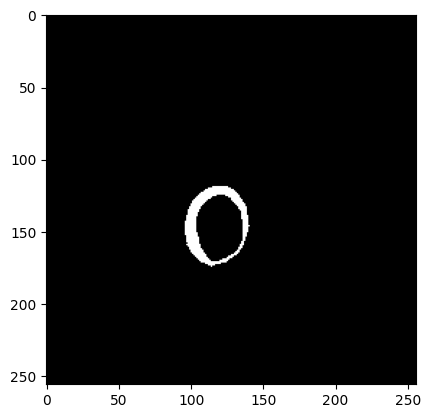

In [23]:
img=np.array(Image.open("/content/dataset/testimages/test/drishtiGS_082.png"))
plt.imshow(img)
plt.show()

img1=np.array(Image.open("/content/dataset/testmasks/test/drishtiGS_082.png"))
plt.imshow(img1[:,:,0],cmap='gray')
plt.show()
img1=np.array(Image.open("/content/dataset/testmasks/test/drishtiGS_082.png"))
plt.imshow(img1[:,:,1],cmap='gray')
plt.show()
img1=np.array(Image.open("/content/dataset/testmasks/test/drishtiGS_082.png"))
plt.imshow(img1[:,:,2],cmap='gray')
plt.show()

In [24]:
from glob import glob

In [25]:
train_files = glob("/content/dataset/trainimages/train/*.png")
train_masks=glob("/content/dataset/trainmasks/train/*.png")
test_files = glob("/content/dataset/testimages/test/*.png")
test_masks = glob("/content/dataset/testmasks/test/*.png")

In [26]:
train_files.sort()
test_files.sort()
train_masks.sort()
test_masks.sort()

In [27]:
print(len(train_files))
print(len(test_files))
print(len(train_masks))
print(len(test_masks))

50
51
50
51


In [28]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import load_img, img_to_array
from sklearn.model_selection import train_test_split

# Paths to the folders
train_images_path = "/content/dataset/trainimages/train/"
train_masks_path = "/content/dataset/trainmasks/train"
test_images_path = "/content/dataset/testimages/test/"
test_masks_path = "/content/dataset/testmasks/test"

# Function to load images and masks
def load_data(image_dir, mask_dir, target_size=(256, 256)):
    images = []
    masks = []
    for img_name in sorted(os.listdir(image_dir)):
        # Load and preprocess the image
        img_path = os.path.join(image_dir, img_name)
        img = load_img(img_path, target_size=target_size)  # Resize the image
        images.append(img)

        # Load and preprocess the corresponding mask
        mask_path = os.path.join(mask_dir, img_name)
        mask = load_img(mask_path, target_size=target_size)
        masks.append(mask)

    return np.array(images), np.array(masks)

# Load train and test data
X_train, y_train = load_data(train_images_path, train_masks_path)
X_test, y_test = load_data(test_images_path, test_masks_path)

print(f"Train images shape: {X_train.shape}")
print(f"Train masks shape: {y_train.shape}")
print(f"Test images shape: {X_test.shape}")
print(f"Test masks shape: {y_test.shape}")


Train images shape: (50, 256, 256, 3)
Train masks shape: (50, 256, 256, 3)
Test images shape: (51, 256, 256, 3)
Test masks shape: (51, 256, 256, 3)


##ignore

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models



def inception_module(input_tensor, filters):
    f1, f3_r, f3, f5_r, f5, pool_proj = filters

    # 1x1 convolution
    conv_1x1 = layers.Conv2D(f1, (1, 1), padding='same', activation='relu')(input_tensor)

    # 3x3 convolution
    conv_3x3 = layers.Conv2D(f3_r, (1, 1), padding='same', activation='relu')(input_tensor)
    conv_3x3 = layers.Conv2D(f3, (3, 3), padding='same', activation='relu')(conv_3x3)

    # 5x5 convolution
    conv_5x5 = layers.Conv2D(f5_r, (1, 1), padding='same', activation='relu')(input_tensor)
    conv_5x5 = layers.Conv2D(f5, (5, 5), padding='same', activation='relu')(conv_5x5)

    # Max pooling and projection
    max_pool = layers.MaxPooling2D((3, 3), strides=(1, 1), padding='same')(input_tensor)
    max_pool = layers.Conv2D(pool_proj, (1, 1), padding='same', activation='relu')(max_pool)

    # Concatenate filters
    output = layers.Concatenate()([conv_1x1, conv_3x3, conv_5x5, max_pool])

    return output

def create_inception_spiking_model(input_shape):
    inputs = layers.Input(shape=input_shape)

    # Initial Conv Layer
    x = layers.Conv2D(32, (3, 3), padding='same', activation='relu')(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D(pool_size=(2, 2))(x)

    # Inception Module 1
    x = inception_module(x, filters=[64, 96, 128, 16, 32, 32])
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D(pool_size=(2, 2))(x)

    # Inception Module 2
    x = inception_module(x, filters=[128, 128, 192, 32, 96, 64])
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D(pool_size=(2, 2))(x)

    # Spiking Layer
    #x = SpikingNeuronLayer()(x)

    # Inception Module 3
    x = inception_module(x, filters=[192, 96, 208, 16, 48, 64])
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D(pool_size=(2, 2))(x)

    # Decoder (Upsample back to 256x256)
    x = layers.Conv2DTranspose(192, (3, 3), strides=(2, 2), padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)

    x = layers.Conv2DTranspose(128, (3, 3), strides=(2, 2), padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)

    x = layers.Conv2DTranspose(64, (3, 3), strides=(2, 2), padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)

    x = layers.Conv2DTranspose(32, (3, 3), strides=(2, 2), padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)

    # Final spiking layer and output

    outputs = layers.Conv2D(3, (1, 1), activation='sigmoid')(x)


    model = models.Model(inputs, outputs)
    return model

# Create the model with the modified inception architecture
inception_spiking_model = create_inception_spiking_model(input_shape=(256, 256, 3))
inception_spiking_model.summary()

m = inception_spiking_model


In [ ]:
import tensorflow as tf

def dice_loss(y_true, y_pred, smooth=1):
    y_true_f = tf.keras.backend.flatten(y_true)
    y_pred_f = tf.keras.backend.flatten(y_pred)
    intersection = tf.keras.backend.sum(y_true_f * y_pred_f)
    return 1 - ((2. * intersection + smooth) / (tf.keras.backend.sum(y_true_f) + tf.keras.backend.sum(y_pred_f) + smooth))

def dice_coefficient(y_true, y_pred, smooth=1):
    y_true_f = tf.keras.backend.flatten(tf.cast(y_true, tf.float32)) # Cast y_true to float32
    y_pred_f = tf.keras.backend.flatten(y_pred)
    intersection = tf.keras.backend.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (tf.keras.backend.sum(y_true_f) + tf.keras.backend.sum(y_pred_f) + smooth)


def dice_coef_OD(y_true, y_pred, smooth=1):
    y_true_f = tf.keras.backend.flatten(tf.cast(y_true[:,:,0], tf.float32)) # Cast y_true to float32
    y_pred_f = tf.keras.backend.flatten(y_pred[:,:,0])
    intersection = tf.keras.backend.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (tf.keras.backend.sum(y_true_f) + tf.keras.backend.sum(y_pred_f) + smooth)

def dice_coef_OC(y_true, y_pred, smooth=1):
    y_true_f = tf.keras.backend.flatten(tf.cast(y_true[:,:,1], tf.float32)) # Cast y_true to float32
    y_pred_f = tf.keras.backend.flatten(y_pred[:,:,1])
    intersection = tf.keras.backend.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (tf.keras.backend.sum(y_true_f) + tf.keras.backend.sum(y_pred_f) + smooth)

In [ ]:
import tensorflow as tf
from tensorflow.keras import backend as K


# Sensitivity (True Positive Rate), using Keras' Recall metric
from tensorflow.keras.metrics import Recall as sensitivity

# IoU (Intersection over Union), using Keras' MeanIoU metric
iou = tf.keras.metrics.MeanIoU(num_classes=2)

# AUC (Area Under the Curve), using Keras' AUC metric
auc = tf.keras.metrics.AUC()

# Precision, using Keras' Precision metric
precision = tf.keras.metrics.Precision()


def specificity(y_true, y_pred):
    y_true = tf.cast(y_true, tf.float32)

    # Remove the channel dimension from y_pred
    y_pred = tf.squeeze(y_pred, axis=-1)

    true_negatives = K.sum(K.round(K.clip((1-y_true) * (1-y_pred), 0, 1)))
    possible_negatives = K.sum(K.round(K.clip(1-y_true, 0, 1)))
    return true_negatives / (possible_negatives + K.epsilon())

In [ ]:
def dice_loss(y_true, y_pred):
    numerator = 2 * tf.reduce_sum(y_true * y_pred)
    denominator = tf.reduce_sum(y_true + y_pred)
    return 1 - numerator / (denominator + 1e-7)

def bce_dice_loss(y_true, y_pred):
    bce = tf.keras.losses.binary_crossentropy(y_true, y_pred)
    dice = dice_loss(y_true, y_pred)
    return bce + dice
m.compile(optimizer='sgd',
          loss=gradient_optimized_dice_loss,
          metrics=[
              'accuracy',              # Overall accuracy
              iou,                     # Intersection over Union
              dice_coefficient,         # Dice Coefficient
              dice_coef_OD,             # Assuming these are defined elsewhere
              dice_coef_OC,             # Assuming these are defined elsewhere
              specificity,              # Custom specificity function
              sensitivity(),            # Sensitivity (Recall)
              auc,                      # Area Under the Curve
              precision                 # Precision
          ])
# m.compile(optimizer='sgd',
#               loss = gradient_optimized_dice_loss,
#               metrics = ['accuracy', tf.keras.metrics.MeanIoU(num_classes = 2), dice_coefficient,dice_coef_OD,dice_coef_OC])


In [ ]:
results=m.fit(train_gen,steps_per_epoch=30,validation_data=val_gen,validation_steps=4,batch_size=4,epochs=250)

In [ ]:
np.unique(y_train)

In [ ]:
m2.load_weights("/content/dristicnn.weights.h5")

##data augmentation


In [29]:
df_train = pd.DataFrame({"image_path": train_files, "mask_path": train_masks})
df2 = pd.DataFrame({"image_path": test_files, "mask_path": test_masks})
# a={"image_path": train_files, "mask_path": mask_files}
# df = pd.DataFrame.from_dict(a, orient='index')
# df = df.transpose()

In [30]:
from sklearn.model_selection import train_test_split
df_val, df_test = train_test_split(df2,test_size=0.5, shuffle = False)

# df_train, df_val = train_test_split(df_train,test_size=0.22, shuffle = False)
print(df_train.values.shape)
print(df_val.values.shape)
print(df_test.values.shape)


(50, 2)
(25, 2)
(26, 2)


In [31]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

# Augmentation configuration for images
image_datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Augmentation configuration for masks (no pixel value changes, just geometric changes)
mask_datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Set the seed for reproducibility
seed = 1

# Image generator
image_generator = image_datagen.flow_from_dataframe(
    df_train,
    x_col='image_path',
    target_size=(256, 256),
    batch_size=4,
    class_mode=None,
    color_mode='rgb',
    seed=seed
)

# Mask generator
mask_generator = mask_datagen.flow_from_dataframe(
    df_train,
    x_col='mask_path',
    target_size=(256, 256),
    batch_size=4,
    class_mode=None,
    color_mode='rgb',
    seed=seed
)

# Custom generator to pair images and masks
class DataGenerator(tf.keras.utils.Sequence):
    def __init__(self, image_generator, mask_generator):
        self.image_generator = image_generator
        self.mask_generator = mask_generator

    def __len__(self):
        return len(self.image_generator)

    def __getitem__(self, index):
        images = self.image_generator[index]
        masks = self.mask_generator[index]
        return images, masks

# Create the training generator
# Validation image generator
val_image_generator = image_datagen.flow_from_dataframe(
    df_val,
    x_col='image_path',
    target_size=(256, 256),
    batch_size=4,
    class_mode=None,
    color_mode='rgb',
    seed=seed
)

# Validation mask generator
val_mask_generator = mask_datagen.flow_from_dataframe(
    df_val,
    x_col='mask_path',
    target_size=(256, 256),
    batch_size=4,
    class_mode=None,
    color_mode='rgb',
    seed=seed
)

# Create the validation generator
val_gen = DataGenerator(val_image_generator, val_mask_generator)

train_gen = DataGenerator(image_generator, mask_generator)




Found 50 validated image filenames.
Found 50 validated image filenames.
Found 25 validated image filenames.
Found 25 validated image filenames.


In [32]:
from typing_extensions import Concatenate
import tensorflow as tf
from tensorflow.keras import layers, models


def inception_module(input_tensor, filters):
    f1, f3_r, f3, f5_r, f5, pool_proj = filters

    # 1x1 convolution
    conv_1x1 = layers.Conv2D(f1, (1, 1), padding='same', activation='relu')(input_tensor)

    # 3x3 convolution
    conv_3x3 = layers.Conv2D(f3_r, (1, 1), padding='same', activation='relu')(input_tensor)
    conv_3x3 = layers.Conv2D(f3, (3, 3), padding='same', activation='relu')(conv_3x3)

    # 5x5 convolution
    conv_5x5 = layers.Conv2D(f5_r, (1, 1), padding='same', activation='relu')(input_tensor)
    conv_5x5 = layers.Conv2D(f5, (5, 5), padding='same', activation='relu')(conv_5x5)

    # Max pooling and projection
    max_pool = layers.MaxPooling2D((3, 3), strides=(1, 1), padding='same')(input_tensor)
    max_pool = layers.Conv2D(pool_proj, (1, 1), padding='same', activation='relu')(max_pool)

    # Concatenate filters
    output = layers.Concatenate()([conv_1x1, conv_3x3, conv_5x5, max_pool])

    return output

def create_inception_spiking_model(input_shape):
    inputs = layers.Input(shape=input_shape)

    # Initial Conv Layer
    x1 = layers.Conv2D(32, (3, 3), padding='same', activation='relu')(inputs)
    x1 = layers.BatchNormalization()(x1)
    p1 = layers.MaxPooling2D(pool_size=(2, 2))(x1)

    # Inception Module 1
    x2 = inception_module(p1, filters=[64, 96, 128, 16, 32, 32])
    x2 = layers.BatchNormalization()(x2)
    p2 = layers.MaxPooling2D(pool_size=(2, 2))(x2)

    # Inception Module 2
    x3 = inception_module(p2, filters=[128, 128, 192, 32, 96, 64])
    x3 = layers.BatchNormalization()(x3)
    p3 = layers.MaxPooling2D(pool_size=(2, 2))(x3)

    # Inception Module 3
    x4 = inception_module(p3, filters=[192, 96, 208, 16, 48, 64])
    x4 = layers.BatchNormalization()(x4)
    p4 = layers.MaxPooling2D(pool_size=(2, 2))(x4)


    # Decoder (Upsample back to 256x256)
    x5 = layers.Conv2DTranspose(192, (3, 3), strides=(2, 2), padding='same', activation='relu')(p4)
    convx1 = layers.Concatenate()([x5, x4])  # Fixed Concatenate usage
    convx1 = layers.BatchNormalization()(convx1)

    x6 = layers.Conv2DTranspose(128, (3, 3), strides=(2, 2), padding='same', activation='relu')(convx1)
    convx2 = layers.Concatenate()([x6, x3])
    convx2 = layers.BatchNormalization()(convx2)

    x7 = layers.Conv2DTranspose(64, (3, 3), strides=(2, 2), padding='same', activation='relu')(convx2)
    convx3 = layers.Concatenate()([x7, x2])
    convx3 = layers.BatchNormalization()(convx3)

    x8 = layers.Conv2DTranspose(32, (3, 3), strides=(2, 2), padding='same', activation='relu')(convx3)
    convx4 = layers.Concatenate()([x8, x1])
    convx4 = layers.BatchNormalization()(convx4)

    outputs = layers.Conv2D(3, (1, 1), activation='sigmoid')(convx4)

    model = models.Model(inputs, outputs)
    return model

# Create the model with the modified inception architecture
inception_spiking_model = create_inception_spiking_model(input_shape=(256, 256, 3))
inception_spiking_model.summary()

m = inception_spiking_model


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 256, 256, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 256, 256, 32)   │            896 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization       │ (None, 256, 256, 32)   │            128 │ conv2d[0][0]           │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d             │ (None, 128, 128, 32)   │              0 │ batch_normalization[0… │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 128, 128, 96)   │          3,168 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_4 (Conv2D)         │ (None, 128, 128, 16)   │            528 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_1           │ (None, 128, 128, 32)   │              0 │ max_pooling2d[0][0]    │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 128, 128, 64)   │          2,112 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, 128, 128, 128)  │        110,720 │ conv2d_2[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_5 (Conv2D)         │ (None, 128, 128, 32)   │         12,832 │ conv2d_4[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_6 (Conv2D)         │ (None, 128, 128, 32)   │          1,056 │ max_pooling2d_1[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate (Concatenate) │ (None, 128, 128, 256)  │              0 │ conv2d_1[0][0],        │
│                           │                        │                │ conv2d_3[0][0],        │
│                           │                        │                │ conv2d_5[0][0],        │
│                           │                        │                │ conv2d_6[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_1     │ (None, 128, 128, 256)  │          1,024 │ concatenate[0][0]      │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_2           │ (None, 64, 64, 256)    │              0 │ batch_normalization_1… │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_8 (Conv2D)         │ (None, 64, 64, 128)    │         32,896 │ max_pooling2d_2[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_10 (Conv2D)   

 Total params: 3,046,851 (11.62 MB)

 Trainable params: 3,040,899 (11.60 MB)

 Non-trainable params: 5,952 (23.25 KB)

In [ ]:
from typing_extensions import Concatenate
import tensorflow as tf
from tensorflow.keras import layers, models


def inception_module(input_tensor, filters):
    f1, f3_r, f3, f5_r, f5, pool_proj = filters

    # 1x1 convolution
    conv_1x1 = layers.Conv2D(f1, (1, 1), padding='same', activation='relu')(input_tensor)

    # 3x3 convolution
    conv_3x3 = layers.Conv2D(f3_r, (1, 1), padding='same', activation='relu')(input_tensor)
    conv_3x3 = layers.Conv2D(f3, (3, 3), padding='same', activation='relu')(conv_3x3)

    # 5x5 convolution
    conv_5x5 = layers.Conv2D(f5_r, (1, 1), padding='same', activation='relu')(input_tensor)
    conv_5x5 = layers.Conv2D(f5, (5, 5), padding='same', activation='relu')(conv_5x5)

    # Max pooling and projection
    max_pool = layers.MaxPooling2D((3, 3), strides=(1, 1), padding='same')(input_tensor)
    max_pool = layers.Conv2D(pool_proj, (1, 1), padding='same', activation='relu')(max_pool)

    # Concatenate filters
    output = layers.Concatenate()([conv_1x1, conv_3x3, conv_5x5, max_pool])

    return output
def channel_attention(input_tensor, ratio=8):
    channels = input_tensor.shape[-1]
    avg_pool = layers.GlobalAveragePooling2D()(input_tensor)
    max_pool = layers.GlobalMaxPooling2D()(input_tensor)
    avg_dense = layers.Dense(channels // ratio, activation='relu')(avg_pool)
    max_dense = layers.Dense(channels // ratio, activation='relu')(max_pool)
    combined = layers.Add()([avg_dense, max_dense])
    scale = layers.Dense(channels, activation='sigmoid')(combined)
    return layers.Multiply()([input_tensor, layers.Reshape((1, 1, channels))(scale)])


def spatial_attention(input_tensor):
    avg_pool = layers.Lambda(lambda x: tf.reduce_mean(x, axis=-1, keepdims=True))(input_tensor)
    max_pool = layers.Lambda(lambda x: tf.reduce_max(x, axis=-1, keepdims=True))(input_tensor)
    concat = layers.Concatenate(axis=-1)([avg_pool, max_pool])
    attention = layers.Conv2D(1, (7, 7), padding='same', activation='sigmoid')(concat)
    return layers.Multiply()([input_tensor, attention])


def add_attention_block(input_tensor):
    x = channel_attention(input_tensor)
    x = spatial_attention(x)
    return x


def create_inception_spiking_model_with_attention(input_shape):
    inputs = layers.Input(shape=input_shape)

    # Initial Conv Layer
    x1 = layers.Conv2D(32, (3, 3), padding='same', activation='relu')(inputs)
    x1 = layers.BatchNormalization()(x1)
    p1 = layers.MaxPooling2D(pool_size=(2, 2))(x1)

    # Inception Module 1
    x2 = inception_module(p1, filters=[64, 96, 128, 16, 32, 32])
    # x2 = add_attention_block(x2)  # Add attention here
    x2 = layers.BatchNormalization()(x2)
    p2 = layers.MaxPooling2D(pool_size=(2, 2))(x2)

    # Inception Module 2
    x3 = inception_module(p2, filters=[128, 128, 192, 32, 96, 64])
    # x3 = add_attention_block(x3)  # Add attention here
    x3 = layers.BatchNormalization()(x3)
    p3 = layers.MaxPooling2D(pool_size=(2, 2))(x3)

    # Inception Module 3
    x4 = inception_module(p3, filters=[192, 96, 208, 16, 48, 64])
    # x4 = add_attention_block(x4)  # Add attention here
    x4 = layers.BatchNormalization()(x4)
    p4 = layers.MaxPooling2D(pool_size=(2, 2))(x4)

    # Decoder (Upsample back to 256x256)
    x5 = layers.Conv2DTranspose(192, (3, 3), strides=(2, 2), padding='same', activation='relu')(p4)
    convx1 = layers.Concatenate()([x5, x4])  # Fixed Concatenate usage
    convx1 = add_attention_block(convx1)  # Add attention here
    convx1 = layers.BatchNormalization()(convx1)

    x6 = layers.Conv2DTranspose(128, (3, 3), strides=(2, 2), padding='same', activation='relu')(convx1)
    convx2 = layers.Concatenate()([x6, x3])
    convx2 = add_attention_block(convx2)  # Add attention here
    convx2 = layers.BatchNormalization()(convx2)

    x7 = layers.Conv2DTranspose(64, (3, 3), strides=(2, 2), padding='same', activation='relu')(convx2)
    convx3 = layers.Concatenate()([x7, x2])
    convx3 = add_attention_block(convx3)  # Add attention here
    convx3 = layers.BatchNormalization()(convx3)

    x8 = layers.Conv2DTranspose(32, (3, 3), strides=(2, 2), padding='same', activation='relu')(convx3)
    convx4 = layers.Concatenate()([x8, x1])
    convx4 = add_attention_block(convx4)  # Add attention here
    convx4 = layers.BatchNormalization()(convx4)

    outputs = layers.Conv2D(3, (1, 1), activation='sigmoid')(convx4)

    model = models.Model(inputs, outputs)
    return model


# Create the model with the modified inception architecture and attention
inception_spiking_model_attention = create_inception_spiking_model_with_attention(input_shape=(256, 256, 3))
inception_spiking_model_attention.summary()

ma = inception_spiking_model_attention


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2             │ (None, 256, 256, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_47 (Conv2D)        │ (None, 256, 256, 32)   │            896 │ input_layer_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_16    │ (None, 256, 256, 32)   │            128 │ conv2d_47[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_14          │ (None, 128, 128, 32)   │              0 │ batch_normalization_1… │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_49 (Conv2D)        │ (None, 128, 128, 96)   │          3,168 │ max_pooling2d_14[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_51 (Conv2D)        │ (None, 128, 128, 16)   │            528 │ max_pooling2d_14[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_15          │ (None, 128, 128, 32)   │              0 │ max_pooling2d_14[0][0] │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_48 (Conv2D)        │ (None, 128, 128, 64)   │          2,112 │ max_pooling2d_14[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_50 (Conv2D)        │ (None, 128, 128, 128)  │        110,720 │ conv2d_49[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_52 (Conv2D)        │ (None, 128, 128, 32)   │         12,832 │ conv2d_51[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_53 (Conv2D)        │ (None, 128, 128, 32)   │          1,056 │ max_pooling2d_15[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_21            │ (None, 128, 128, 256)  │              0 │ conv2d_48[0][0],       │
│ (Concatenate)             │                        │                │ conv2d_50[0][0],       │
│                           │                        │                │ conv2d_52[0][0],       │
│                           │                        │                │ conv2d_53[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_17    │ (None, 128, 128, 256)  │          1,024 │ concatenate_21[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_16          │ (None, 64, 64, 256)    │              0 │ batch_normalization_1… │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_55 (Conv2D)        │ (None, 64, 64, 128)    │         32,896 │ max_pooling2d_16[0][0] │
├──────────────────────

 Total params: 3,413,783 (13.02 MB)

 Trainable params: 3,407,831 (13.00 MB)

 Non-trainable params: 5,952 (23.25 KB)

In [43]:
import tensorflow as tf
from tensorflow.keras import layers, models

def inception_module(input_tensor, filters):
    f1, f3_r, f3, f5_r, f5, pool_proj = filters

    # 1x1 convolution
    conv_1x1 = layers.Conv2D(f1, (1, 1), padding='same', activation='relu')(input_tensor)

    # 3x3 convolution
    conv_3x3 = layers.Conv2D(f3_r, (1, 1), padding='same', activation='relu')(input_tensor)
    conv_3x3 = layers.Conv2D(f3, (3, 3), padding='same', activation='relu')(conv_3x3)

    # 5x5 convolution
    conv_5x5 = layers.Conv2D(f5_r, (1, 1), padding='same', activation='relu')(input_tensor)
    conv_5x5 = layers.Conv2D(f5, (5, 5), padding='same', activation='relu')(conv_5x5)

    # Max pooling and projection
    max_pool = layers.MaxPooling2D((3, 3), strides=(1, 1), padding='same')(input_tensor)
    max_pool = layers.Conv2D(pool_proj, (1, 1), padding='same', activation='relu')(max_pool)

    # Concatenate filters
    output = layers.Concatenate()([conv_1x1, conv_3x3, conv_5x5, max_pool])

    return output

def channel_attention(input_tensor, ratio=8):
    channels = input_tensor.shape[-1]
    avg_pool = layers.GlobalAveragePooling2D()(input_tensor)
    max_pool = layers.GlobalMaxPooling2D()(input_tensor)
    avg_dense = layers.Dense(channels // ratio, activation='relu')(avg_pool)
    max_dense = layers.Dense(channels // ratio, activation='relu')(max_pool)
    combined = layers.Add()([avg_dense, max_dense])
    scale = layers.Dense(channels, activation='sigmoid')(combined)
    return layers.Multiply()([input_tensor, layers.Reshape((1, 1, channels))(scale)])

def spatial_attention(input_tensor):
    avg_pool = layers.Lambda(lambda x: tf.reduce_mean(x, axis=-1, keepdims=True))(input_tensor)
    max_pool = layers.Lambda(lambda x: tf.reduce_max(x, axis=-1, keepdims=True))(input_tensor)
    concat = layers.Concatenate(axis=-1)([avg_pool, max_pool])
    attention = layers.Conv2D(1, (7, 7), padding='same', activation='sigmoid')(concat)
    return layers.Multiply()([input_tensor, attention])

def add_attention_block(input_tensor):
    x = channel_attention(input_tensor)
    x = spatial_attention(x)
    return x

def create_inception_spiking_model_with_attention(input_shape):
    inputs = layers.Input(shape=input_shape)

    # Initial Conv Layer
    x1 = layers.Conv2D(32, (3, 3), padding='same', activation='relu')(inputs)
    x1 = layers.BatchNormalization()(x1)
    x1 = add_attention_block(x1)  # Attention after initial conv layer
    p1 = layers.MaxPooling2D(pool_size=(2, 2))(x1)

    # Inception Module 1 with Attention
    x2 = inception_module(p1, filters=[64, 96, 128, 16, 32, 32])
    x2 = add_attention_block(x2)
    x2 = layers.BatchNormalization()(x2)
    p2 = layers.MaxPooling2D(pool_size=(2, 2))(x2)

    # Inception Module 2 with Attention
    x3 = inception_module(p2, filters=[128, 128, 192, 32, 96, 64])
    x3 = add_attention_block(x3)
    x3 = layers.BatchNormalization()(x3)
    p3 = layers.MaxPooling2D(pool_size=(2, 2))(x3)

    # Inception Module 3 with Attention
    x4 = inception_module(p3, filters=[192, 96, 208, 16, 48, 64])
    x4 = add_attention_block(x4)
    x4 = layers.BatchNormalization()(x4)
    p4 = layers.MaxPooling2D(pool_size=(2, 2))(x4)

    # Decoder (Upsample back to 256x256)
    x5 = layers.Conv2DTranspose(192, (3, 3), strides=(2, 2), padding='same', activation='relu')(p4)
    x5 = add_attention_block(x5)  # Add attention before concatenation
    convx1 = layers.Concatenate()([x5, x4])
    convx1 = layers.BatchNormalization()(convx1)

    x6 = layers.Conv2DTranspose(128, (3, 3), strides=(2, 2), padding='same', activation='relu')(convx1)
    x6 = add_attention_block(x6)  # Add attention before concatenation
    convx2 = layers.Concatenate()([x6, x3])
    convx2 = layers.BatchNormalization()(convx2)

    x7 = layers.Conv2DTranspose(64, (3, 3), strides=(2, 2), padding='same', activation='relu')(convx2)
    x7 = add_attention_block(x7)  # Add attention before concatenation
    convx3 = layers.Concatenate()([x7, x2])
    convx3 = layers.BatchNormalization()(convx3)

    x8 = layers.Conv2DTranspose(32, (3, 3), strides=(2, 2), padding='same', activation='relu')(convx3)
    x8 = add_attention_block(x8)  # Add attention before concatenation
    convx4 = layers.Concatenate()([x8, x1])
    convx4 = layers.BatchNormalization()(convx4)

    outputs = layers.Conv2D(3, (1, 1), activation='sigmoid')(convx4)

    model = models.Model(inputs, outputs)
    return model

# Create the model with the modified inception architecture and attention
inception_spiking_model_attention = create_inception_spiking_model_with_attention(input_shape=(256, 256, 3))
inception_spiking_model_attention.summary()
ma = inception_spiking_model_attention

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_5             │ (None, 256, 256, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_111 (Conv2D)       │ (None, 256, 256, 32)   │            896 │ input_layer_5[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_33    │ (None, 256, 256, 32)   │            128 │ conv2d_111[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ global_average_pooling2d… │ (None, 32)             │              0 │ batch_normalization_3… │
│ (GlobalAveragePooling2D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ global_max_pooling2d_13   │ (None, 32)             │              0 │ batch_normalization_3… │
│ (GlobalMaxPooling2D)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_39 (Dense)          │ (None, 4)              │            132 │ global_average_poolin… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_40 (Dense)          │ (None, 4)              │            132 │ global_max_pooling2d_… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_13 (Add)              │ (None, 4)              │              0 │ dense_39[0][0],        │
│                           │                        │                │ dense_40[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_41 (Dense)          │ (None, 32)             │            160 │ add_13[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ reshape_13 (Reshape)      │ (None, 1, 1, 32)       │              0 │ dense_41[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ multiply_26 (Multiply)    │ (None, 256, 256, 32)   │              0 │ batch_normalization_3… │
│                           │                        │                │ reshape_13[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lambda_26 (Lambda)        │ (None, 256, 256, 1)    │              0 │ multiply_26[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lambda_27 (Lambda)        │ (None, 256, 256, 1)    │              0 │ multiply_26[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_41            │ (None, 256, 256, 2)    │              0 │ lambda_26[0][0],       │
│ (Concatenate)             │                        │                │ lambda_27[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_112 (Conv2D)       │ (None, 256, 256, 1)    │             99 │ concatenate_41[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ multiply_27 (Multiply)    │ (None, 256, 256, 32)   │              0 │ multiply_26[0][0],     │
│                      

 Total params: 3,281,315 (12.52 MB)

 Trainable params: 3,275,363 (12.49 MB)

 Non-trainable params: 5,952 (23.25 KB)

In [ ]:
# import tensorflow as tf
# from tensorflow.keras import backend as K

# def tversky_loss(y_true, y_pred, alpha=0.5, beta=0.5, smooth=1e-6):
#     """
#     Tversky loss function for image segmentation tasks.

#     Parameters:
#         y_true (tensor): Ground truth binary masks (0s and 1s).
#         y_pred (tensor): Predicted probabilities.
#         alpha (float): Weight for false positives.
#         beta (float): Weight for false negatives.
#         smooth (float): Small constant to avoid division by zero.

#     Returns:
#         Tensor: Tversky loss.
#     """
#     # Flatten tensors to ensure the same shapes
#     y_true_f = K.flatten(y_true)
#     y_pred_f = K.flatten(y_pred)

#     # Calculate true positives, false positives, and false negatives
#     true_pos = K.sum(y_true_f * y_pred_f)
#     false_neg = K.sum(y_true_f * (1 - y_pred_f))
#     false_pos = K.sum((1 - y_true_f) * y_pred_f)

#     # Tversky index
#     tversky_index = (true_pos + smooth) / (true_pos + alpha * false_neg + beta * false_pos + smooth)

#     # Tversky loss
#     return 1 - tversky_index

# def combined_bce_tversky_loss(y_true, y_pred, alpha=0.5, beta=0.5, smooth=1e-6, bce_weight=0.5, tversky_weight=0.5):
#     """
#     Combined loss of Binary Cross-Entropy (BCE) and Tversky Loss.

#     Parameters:
#         y_true (tensor): Ground truth binary masks (0s and 1s).
#         y_pred (tensor): Predicted probabilities.
#         alpha (float): Weight for false positives in Tversky Loss.
#         beta (float): Weight for false negatives in Tversky Loss.
#         smooth (float): Small constant to avoid division by zero.
#         bce_weight (float): Weight for BCE loss contribution.
#         tversky_weight (float): Weight for Tversky loss contribution.

#     Returns:
#         Tensor: Combined loss value.
#     """
#     # Binary Cross-Entropy Loss
#     bce_loss = tf.keras.losses.binary_crossentropy(y_true, y_pred)

#     # Tversky Loss
#     tversky = tversky_loss(y_true, y_pred, alpha, beta, smooth)

#     # Combined Loss
#     combined_loss = (bce_weight * bce_loss)*(0.7)+ (tversky_weight * tversky)*(0.3)
#     return combined_loss

### dice loss + cross entropy

In [44]:
import tensorflow as tf

def dice_loss(y_true, y_pred):
    numerator = 2 * tf.reduce_sum(y_true * y_pred)
    denominator = tf.reduce_sum(y_true + y_pred) + 1e-6
    return 1 - (numerator / denominator)

def combined_loss(y_true, y_pred, lambda1=0.5, lambda2=0.5):
    ce_loss = tf.keras.losses.BinaryCrossentropy()(y_true, y_pred)
    d_loss = dice_loss(y_true, y_pred)
    return lambda1 * d_loss + lambda2 * ce_loss


In [45]:
def dice_coefficient(y_true, y_pred, smooth=1):

    dice_od = dice_coef_OD(y_true, y_pred, smooth)
    dice_oc = dice_coef_OC(y_true, y_pred, smooth)
    return (dice_od + dice_oc) / 2.0

In [46]:
import tensorflow as tf

# def dice_loss(y_true, y_pred, smooth=1):
#     y_true_f = tf.keras.backend.flatten(y_true)
#     y_pred_f = tf.keras.backend.flatten(y_pred)
#     intersection = tf.keras.backend.sum(y_true_f * y_pred_f)
#     return 1 - ((2. * intersection + smooth) / (tf.keras.backend.sum(y_true_f) + tf.keras.backend.sum(y_pred_f) + smooth))

# def dice_coefficient(y_true, y_pred, smooth=1):
#     y_true_f = tf.keras.backend.flatten(tf.cast(y_true, tf.float32)) # Cast y_true to float32
#     y_pred_f = tf.keras.backend.flatten(y_pred)
#     intersection = tf.keras.backend.sum(y_true_f * y_pred_f)
#     return (2. * intersection + smooth) / (tf.keras.backend.sum(y_true_f) + tf.keras.backend.sum(y_pred_f) + smooth)


def dice_coef_OD(y_true, y_pred, smooth=1):
    y_true_f = tf.keras.backend.flatten(tf.cast(y_true[:,:,0], tf.float32)) # Cast y_true to float32
    y_pred_f = tf.keras.backend.flatten(y_pred[:,:,0])
    intersection = tf.keras.backend.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (tf.keras.backend.sum(y_true_f) + tf.keras.backend.sum(y_pred_f) + smooth)

def dice_coef_OC(y_true, y_pred, smooth=1):
    y_true_f = tf.keras.backend.flatten(tf.cast(y_true[:,:,1], tf.float32)) # Cast y_true to float32
    y_pred_f = tf.keras.backend.flatten(y_pred[:,:,1])
    intersection = tf.keras.backend.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (tf.keras.backend.sum(y_true_f) + tf.keras.backend.sum(y_pred_f) + smooth)

In [47]:
# def dice_loss(y_true, y_pred):
#     numerator = 2 * tf.reduce_sum(y_true * y_pred)
#     denominator = tf.reduce_sum(y_true + y_pred)
#     return 1 - numerator / (denominator + 1e-7)

# def bce_dice_loss(y_true, y_pred):
#     bce = tf.keras.losses.binary_crossentropy(y_true, y_pred)
#     dice = dice_loss(y_true, y_pred)
#     return bce + dice

In [48]:
import tensorflow as tf
from tensorflow.keras import backend as K


# Sensitivity (True Positive Rate), using Keras' Recall metric
from tensorflow.keras.metrics import Recall as sensitivity

# IoU (Intersection over Union), using Keras' MeanIoU metric
iou = tf.keras.metrics.MeanIoU(num_classes=2)

# AUC (Area Under the Curve), using Keras' AUC metric
auc = tf.keras.metrics.AUC()

# Precision, using Keras' Precision metric
precision = tf.keras.metrics.Precision()



def specificity(y_true, y_pred):
    y_true = tf.cast(y_true, tf.float32)

    true_negatives = K.sum(K.round(K.clip((1-y_true) * (1-y_pred), 0, 1)))
    possible_negatives = K.sum(K.round(K.clip(1-y_true, 0, 1)))
    return true_negatives / (possible_negatives + K.epsilon())

# Compile the model with all the metrics
ma.compile(optimizer='sgd',
          loss= combined_loss,
          metrics=[
              'accuracy',              # Overall accuracy
              iou,                     # Intersection over Union
              dice_coefficient,         # Dice Coefficient
              dice_coef_OD,             # Assuming these are defined elsewhere
              dice_coef_OC,             # Assuming these are defined elsewhere
              specificity,              # Custom specificity function
              sensitivity(),            # Sensitivity (Recall)
              auc,                      # Area Under the Curve
              precision                 # Precision
          ])


In [49]:
results=ma.fit(train_gen,steps_per_epoch=30,validation_data=val_gen,validation_steps=4,batch_size=4,epochs=150)


Epoch 1/150
13/30 ━━━━━━━━━━━━━━━━━━━━ 47s 3s/step - accuracy: 0.3175 - auc_1: 0.5954 - dice_coef_oc: 7.5610e-04 - dice_coef_od: 8.6089e-04 - dice_coefficient: 8.0849e-04 - loss: 0.8605 - mean_io_u_1: 0.4905 - precision_1: 0.0262 - recall_1: 0.6494 - specificity: 0.4445

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)
/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


30/30 ━━━━━━━━━━━━━━━━━━━━ 79s 2s/step - accuracy: 0.3136 - auc_1: 0.5920 - dice_coef_oc: 7.4455e-04 - dice_coef_od: 8.4201e-04 - dice_coefficient: 7.9328e-04 - loss: 0.8593 - mean_io_u_1: 0.4906 - precision_1: 0.0259 - recall_1: 0.6436 - specificity: 0.4450 - val_accuracy: 0.7311 - val_auc_1: 0.4921 - val_dice_coef_oc: 6.3924e-04 - val_dice_coef_od: 6.5650e-04 - val_dice_coefficient: 6.4787e-04 - val_loss: 0.8304 - val_mean_io_u_1: 0.4898 - val_precision_1: 0.0191 - val_recall_1: 0.3871 - val_specificity: 0.5069
Epoch 2/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 21s 337ms/step - accuracy: 0.3105 - auc_1: 0.5893 - dice_coef_oc: 7.0979e-04 - dice_coef_od: 8.2246e-04 - dice_coefficient: 7.6613e-04 - loss: 0.8479 - mean_io_u_1: 0.4904 - precision_1: 0.0269 - recall_1: 0.6265 - specificity: 0.4697 - val_accuracy: 0.7759 - val_auc_1: 0.5567 - val_dice_coef_oc: 0.0013 - val_dice_coef_od: 0.0014 - val_dice_coefficient: 0.0014 - val_loss: 0.8221 - val_mean_io_u_1: 0.4892 - val_precision_1: 0.0277 - val_re

In [50]:
results=ma.fit(train_gen,steps_per_epoch=30,validation_data=val_gen,validation_steps=4,batch_size=4,epochs=150)

Epoch 1/150
13/30 ━━━━━━━━━━━━━━━━━━━━ 2s 172ms/step - accuracy: 0.4010 - auc_1: 0.9860 - dice_coef_oc: 0.0232 - dice_coef_od: 0.0342 - dice_coefficient: 0.0287 - loss: 0.2932 - mean_io_u_1: 0.4915 - precision_1: 0.6653 - recall_1: 0.7071 - specificity: 0.9906

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 128ms/step - accuracy: 0.4067 - auc_1: 0.9860 - dice_coef_oc: 0.0248 - dice_coef_od: 0.0349 - dice_coefficient: 0.0299 - loss: 0.2919 - mean_io_u_1: 0.4919 - precision_1: 0.6566 - recall_1: 0.7117 - specificity: 0.9901 - val_accuracy: 0.2149 - val_auc_1: 0.9818 - val_dice_coef_oc: 0.0288 - val_dice_coef_od: 0.0385 - val_dice_coefficient: 0.0336 - val_loss: 0.2994 - val_mean_io_u_1: 0.4898 - val_precision_1: 0.7053 - val_recall_1: 0.6048 - val_specificity: 0.9929
Epoch 2/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - accuracy: 0.4062 - auc_1: 0.9590 - dice_coef_oc: 0.0241 - dice_coef_od: 0.0376 - dice_coefficient: 0.0308 - loss: 0.3162 - mean_io_u_1: 0.4932 - precision_1: 0.6107 - recall_1: 0.6534 - specificity: 0.9891 - val_accuracy: 0.1995 - val_auc_1: 0.7733 - val_dice_coef_oc: 0.0562 - val_dice_coef_od: 0.0564 - val_dice_coefficient: 0.0563 - val_loss: 0.4088 - val_mean_io_u_1: 0.4917 - val_precision_1: 0.4429 - val_recall_1: 0.3521 - val_specificity: 0.

In [61]:
results=ma.fit(train_gen,steps_per_epoch=30,validation_data=val_gen,validation_steps=4,batch_size=4,epochs=100)

Epoch 1/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 91ms/step - accuracy: 0.1333 - auc_1: 0.9956 - dice_coef_oc: 0.2462 - dice_coef_od: 0.3943 - dice_coefficient: 0.3202 - loss: 0.1150 - mean_io_u_1: 0.4928 - precision_1: 0.8563 - recall_1: 0.8285 - specificity: 0.9958 - val_accuracy: 0.1779 - val_auc_1: 0.9802 - val_dice_coef_oc: 0.2085 - val_dice_coef_od: 0.3507 - val_dice_coefficient: 0.2796 - val_loss: 0.1433 - val_mean_io_u_1: 0.4915 - val_precision_1: 0.8801 - val_recall_1: 0.7113 - val_specificity: 0.9967
Epoch 2/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 59ms/step - accuracy: 0.1393 - auc_1: 0.9932 - dice_coef_oc: 0.2669 - dice_coef_od: 0.3849 - dice_coefficient: 0.3259 - loss: 0.1192 - mean_io_u_1: 0.4923 - precision_1: 0.8594 - recall_1: 0.8020 - specificity: 0.9959 - val_accuracy: 0.1076 - val_auc_1: 0.9871 - val_dice_coef_oc: 0.3846 - val_dice_coef_od: 0.4497 - val_dice_coefficient: 0.4171 - val_loss: 0.1477 - val_mean_io_u_1: 0.4878 - val_precision_1: 0.8912 - val_recall_1: 0.6560 - val_spec

In [ ]:
results=ma.fit(train_gen,steps_per_epoch=30,validation_data=val_gen,validation_steps=4,batch_size=4,epochs=150)

Epoch 1/150
13/30 ━━━━━━━━━━━━━━━━━━━━ 2s 140ms/step - accuracy: 0.1128 - auc_1: 0.9937 - dice_coef_oc: 0.3792 - dice_coef_od: 0.5319 - dice_coefficient: 0.4555 - loss: 0.0770 - mean_io_u_1: 0.4928 - precision_1: 0.9185 - recall_1: 0.8622 - specificity: 0.9975

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 92ms/step - accuracy: 0.1112 - auc_1: 0.9940 - dice_coef_oc: 0.3780 - dice_coef_od: 0.5334 - dice_coefficient: 0.4557 - loss: 0.0767 - mean_io_u_1: 0.4935 - precision_1: 0.9191 - recall_1: 0.8616 - specificity: 0.9974 - val_accuracy: 0.1966 - val_auc_1: 0.9838 - val_dice_coef_oc: 0.3422 - val_dice_coef_od: 0.5301 - val_dice_coefficient: 0.4362 - val_loss: 0.0963 - val_mean_io_u_1: 0.4918 - val_precision_1: 0.9217 - val_recall_1: 0.7911 - val_specificity: 0.9973
Epoch 2/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - accuracy: 0.1061 - auc_1: 0.9729 - dice_coef_oc: 0.3590 - dice_coef_od: 0.5635 - dice_coefficient: 0.4613 - loss: 0.1008 - mean_io_u_1: 0.4951 - precision_1: 0.8844 - recall_1: 0.8156 - specificity: 0.9965 - val_accuracy: 0.0994 - val_auc_1: 0.6702 - val_dice_coef_oc: 0.5326 - val_dice_coef_od: 0.5945 - val_dice_coefficient: 0.5636 - val_loss: 0.4789 - val_mean_io_u_1: 0.4889 - val_precision_1: 0.2909 - val_recall_1: 0.2534 - val_specificity: 0.9

In [ ]:
ma.save_weights("/content/drive/MyDrive/weights of dristi.weights.h5")

In [62]:
ma.save_weights("/content/drive/MyDrive/dristi(att).weights.h5")

In [63]:
X_test_final, y_test_final = load_data(test_images_path, test_masks_path)
ma.evaluate(X_test_final, y_test_final)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 211ms/step - accuracy: 0.1056 - auc_1: 0.9843 - dice_coef_oc: 0.0903 - dice_coef_od: 0.1228 - dice_coefficient: 0.1065 - loss: 0.1073 - mean_io_u_1: 0.4898 - precision_1: 0.8667 - recall_1: 0.8013 - specificity: 0.9972


[0.10753367841243744,
 0.10353956371545792,
 0.4898449182510376,
 0.11569453775882721,
 0.13277792930603027,
 0.09861114621162415,
 0.9971187710762024,
 0.8044033646583557,
 0.9843766093254089,
 0.8624114394187927]

In [64]:
T1=X_test_final[0]
T1=np.expand_dims(T1,axis=0)
out3=ma.predict(T1)

y_test[0].shape

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


(256, 256, 3)

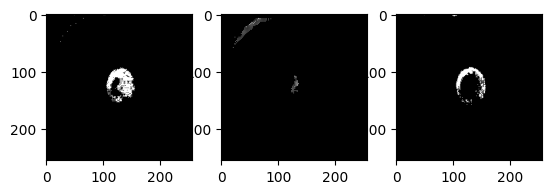

In [65]:
fig, ax = plt.subplots(1, 3)
ax[0].imshow(out3[0][:,:,0]>0.8, cmap='gray')  # Channel 0
ax[1].imshow(out3[0][:,:,1]>0.8, cmap='gray')  # Channel 1
ax[2].imshow(out3[0][:,:,2]>0.8, cmap='gray')  # Channel 2


plt.show()

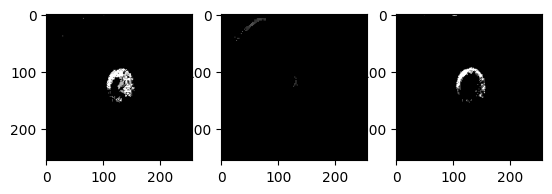

In [66]:
fig, ax = plt.subplots(1, 3)
ax[0].imshow(out3[0][:,:,0]>0.9, cmap='gray')  # Channel 0
ax[1].imshow(out3[0][:,:,1]>0.9, cmap='gray')  # Channel 1
ax[2].imshow(out3[0][:,:,2]>0.9, cmap='gray')  # Channel 2


plt.show()

#trail(gradient_loss)

In [ ]:
import tensorflow as tf
from tensorflow.keras import backend as K

def gradient_optimized_dice_loss(y_true, y_pred, smooth=1e-6):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)

    intersection = K.sum(y_true_f * y_pred_f)
    # Adding K.epsilon() to the denominator to prevent division by zero
    dice = (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth + K.epsilon())

    return 1 - dice  # Return the loss as 1 - Dice coefficient

In [ ]:
mod = tf.keras.models.clone_model(m)


In [ ]:
mod.compile(optimizer='sgd',
          loss=gradient_optimized_dice_loss,
          metrics=[
              'accuracy',              # Overall accuracy
              iou,                     # Intersection over Union
              dice_coefficient,         # Dice Coefficient
              dice_coef_OD,             # Assuming these are defined elsewhere
              dice_coef_OC,             # Assuming these are defined elsewhere
              specificity,              # Custom specificity function
              sensitivity(),            # Sensitivity (Recall)
              auc,                      # Area Under the Curve
              precision                 # Precision
          ])


In [ ]:
results=mod.fit(train_gen,steps_per_epoch=30,validation_data=val_gen,validation_steps=4,batch_size=4,epochs=10)

Epoch 1/10
13/30 ━━━━━━━━━━━━━━━━━━━━ 14s 875ms/step - accuracy: 0.5132 - auc_3: 0.5130 - dice_coef_oc: 6.5517e-04 - dice_coef_od: 6.4718e-04 - dice_coefficient: 0.0394 - loss: 0.9606 - mean_io_u_4: 0.4907 - precision_3: 0.0234 - recall_6: 0.5246 - specificity: 0.5048

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


30/30 ━━━━━━━━━━━━━━━━━━━━ 29s 517ms/step - accuracy: 0.5129 - auc_3: 0.5128 - dice_coef_oc: 6.8054e-04 - dice_coef_od: 6.7222e-04 - dice_coefficient: 0.0403 - loss: 0.9598 - mean_io_u_4: 0.4905 - precision_3: 0.0239 - recall_6: 0.5248 - specificity: 0.5048 - val_accuracy: 0.8429 - val_auc_3: 0.5350 - val_dice_coef_oc: 6.5020e-04 - val_dice_coef_od: 6.5051e-04 - val_dice_coefficient: 0.0433 - val_loss: 0.9567 - val_mean_io_u_4: 0.4897 - val_precision_3: 0.0315 - val_recall_6: 0.5519 - val_specificity: 0.5716
Epoch 2/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 22s 218ms/step - accuracy: 0.5159 - auc_3: 0.5152 - dice_coef_oc: 7.0324e-04 - dice_coef_od: 6.8982e-04 - dice_coefficient: 0.0396 - loss: 0.9606 - mean_io_u_4: 0.4907 - precision_3: 0.0235 - recall_6: 0.5271 - specificity: 0.5052 - val_accuracy: 0.9751 - val_auc_3: 0.5865 - val_dice_coef_oc: 0.0013 - val_dice_coef_od: 0.0013 - val_dice_coefficient: 0.0415 - val_loss: 0.9557 - val_mean_io_u_4: 0.4895 - val_precision_3: 0.0376 - val_recall_6: 0.

In [ ]:
results=mod.fit(train_gen,steps_per_epoch=30,validation_data=val_gen,validation_steps=4,batch_size=4,epochs=100)

Epoch 1/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step - accuracy: 0.5253 - auc_3: 0.5333 - dice_coef_oc: 7.1455e-04 - dice_coef_od: 7.0591e-04 - dice_coefficient: 0.0421 - loss: 0.9582 - mean_io_u_4: 0.4904 - precision_3: 0.0254 - recall_6: 0.5521 - specificity: 0.5064 - val_accuracy: 0.9988 - val_auc_3: 0.5746 - val_dice_coef_oc: 6.5036e-04 - val_dice_coef_od: 6.5508e-04 - val_dice_coefficient: 0.0454 - val_loss: 0.9546 - val_mean_io_u_4: 0.4897 - val_precision_3: 0.0347 - val_recall_6: 0.4997 - val_specificity: 0.6491
Epoch 2/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.5258 - auc_3: 0.5328 - dice_coef_oc: 6.8648e-04 - dice_coef_od: 6.7762e-04 - dice_coefficient: 0.0420 - loss: 0.9584 - mean_io_u_4: 0.4905 - precision_3: 0.0252 - recall_6: 0.5513 - specificity: 0.5065 - val_accuracy: 0.9948 - val_auc_3: 0.5710 - val_dice_coef_oc: 0.0013 - val_dice_coef_od: 0.0013 - val_dice_coefficient: 0.0457 - val_loss: 0.9533 - val_mean_io_u_4: 0.4894 - val_precision_3: 0.0348 - val_rec

In [ ]:
X_test_final, y_test_final = load_data(test_images_path, test_masks_path)
m.evaluate(X_test_final, y_test_final)

2/2 ━━━━━━━━━━━━━━━━━━━━ 32s 13s/step - accuracy: 0.8730 - auc_3: 0.5118 - dice_coef_oc: 1.0106e-04 - dice_coef_od: 1.0084e-04 - dice_coefficient: 0.0408 - loss: 1.6301 - mean_io_u_4: 0.4893 - precision_3: 0.0315 - recall_3: 0.3888 - specificity: 0.7387


[1.6302188634872437,
 0.8739680647850037,
 0.48938456177711487,
 0.040458112955093384,
 0.0001102027454180643,
 0.00011045465362258255,
 0.7380588054656982,
 0.3879567086696625,
 0.5097678899765015,
 0.031187137588858604]

In [ ]:
T1=X_test_final[0]
T1=np.expand_dims(T1,axis=0)
out3=mod.predict(T1)

y_test[0].shape

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


(256, 256, 3)

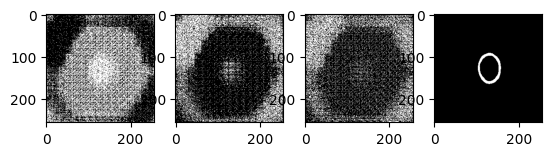

In [ ]:
fig, ax = plt.subplots(1,4)
ax[0].imshow(out3[0][:,:,0]>0.6, cmap='gray')  # Channel 0
ax[1].imshow(out3[0][:,:,1]>0.6, cmap='gray')  # Channel 1
# Channel 2
ax[2].imshow(out3[0][:,:,2]>0.6, cmap='gray')
ax[3].imshow(y_test[0][:,:,2]>0.6, cmap='gray')
plt.show()

# Spiking

In [ ]:
class SpikingNeuronLayer(layers.Layer):
    def __init__(self, beta=0.9, threshold=0.8, **kwargs):
        super(SpikingNeuronLayer, self).__init__(**kwargs)
        self.beta = beta
        self.threshold = threshold

    def call(self, inputs, training=None):
        membrane_potential = self.beta * inputs
        spikes = tf.cast(membrane_potential >= self.threshold, tf.float32)
        reset_mask = membrane_potential >= self.threshold
        membrane_potential = tf.where(reset_mask, tf.zeros_like(membrane_potential), membrane_potential)
        return spikes

In [ ]:
from tensorflow.keras import layers, models

def create_inception_spiking_model2(input_shape):
    inputs = layers.Input(shape=input_shape)

    # Initial Conv Layer
    x1 = layers.Conv2D(32, (3, 3), padding='same', activation='relu')(inputs)
    x1 = layers.BatchNormalization()(x1)
    p1 = layers.MaxPooling2D(pool_size=(2, 2))(x1)

    # Inception Module 1
    x2 = inception_module(p1, filters=[64, 96, 128, 16, 32, 32])
    x2 = layers.BatchNormalization()(x2)
    p2 = layers.MaxPooling2D(pool_size=(2, 2))(x2)
    p2 = SpikingNeuronLayer()(p2)  # Add spiking layer

    # Inception Module 2
    x3 = inception_module(p2, filters=[128, 128, 192, 32, 96, 64])
    x3 = layers.BatchNormalization()(x3)
    p3 = layers.MaxPooling2D(pool_size=(2, 2))(x3)
    p3 = SpikingNeuronLayer()(p3)  # Add spiking layer

    # Inception Module 3
    x4 = inception_module(p3, filters=[192, 96, 208, 16, 48, 64])
    x4 = layers.BatchNormalization()(x4)
    p4 = layers.MaxPooling2D(pool_size=(2, 2))(x4)
    p4 = SpikingNeuronLayer()(p4)  # Add spiking layer

    # Decoder (Upsample back to 256x256 with concatenation)
    x5 = layers.Conv2DTranspose(192, (3, 3), strides=(2, 2), padding='same', activation='relu')(p4)
    x5 = layers.Concatenate()([x5, x4])
    x5 = layers.BatchNormalization()(x5)

    x6 = layers.Conv2DTranspose(128, (3, 3), strides=(2, 2), padding='same', activation='relu')(x5)
    x6 = layers.Concatenate()([x6, x3])
    x6 = layers.BatchNormalization()(x6)

    x7 = layers.Conv2DTranspose(64, (3, 3), strides=(2, 2), padding='same', activation='relu')(x6)
    x7 = layers.Concatenate()([x7, x2])
    x7 = layers.BatchNormalization()(x7)

    x8 = layers.Conv2DTranspose(32, (3, 3), strides=(2, 2), padding='same', activation='relu')(x7)
    x8 = layers.Concatenate()([x8, x1])
    x8 = layers.BatchNormalization()(x8)

    # Final output
    outputs = layers.Conv2D(3, (1, 1), activation='sigmoid')(x8)

    model = models.Model(inputs, outputs)
    return model

# Create the model with spiking layers and concatenation
inception_spiking_model2 = create_inception_spiking_model2(input_shape=(256, 256, 3))
inception_spiking_model2.summary()
m2 = inception_spiking_model2

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 256, 256, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_20 (Conv2D)        │ (None, 256, 256, 32)   │            896 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_8     │ (None, 256, 256, 32)   │            128 │ conv2d_20[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_7           │ (None, 128, 128, 32)   │              0 │ batch_normalization_8… │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_22 (Conv2D)        │ (None, 128, 128, 96)   │          3,168 │ max_pooling2d_7[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_24 (Conv2D)        │ (None, 128, 128, 16)   │            528 │ max_pooling2d_7[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_8           │ (None, 128, 128, 32)   │              0 │ max_pooling2d_7[0][0]  │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_21 (Conv2D)        │ (None, 128, 128, 64)   │          2,112 │ max_pooling2d_7[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_23 (Conv2D)        │ (None, 128, 128, 128)  │        110,720 │ conv2d_22[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_25 (Conv2D)        │ (None, 128, 128, 32)   │         12,832 │ conv2d_24[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_26 (Conv2D)        │ (None, 128, 128, 32)   │          1,056 │ max_pooling2d_8[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_7             │ (None, 128, 128, 256)  │              0 │ conv2d_21[0][0],       │
│ (Concatenate)             │                        │                │ conv2d_23[0][0],       │
│                           │                        │                │ conv2d_25[0][0],       │
│                           │                        │                │ conv2d_26[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_9     │ (None, 128, 128, 256)  │          1,024 │ concatenate_7[0][0]    │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_9           │ (None, 64, 64, 256)    │              0 │ batch_normalization_9… │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ spiking_neuron_layer      │ (None, 64, 64, 256)    │              0 │ max_pooling2d_9[0][0]  │
│ (SpikingNeuronLayer) 

 Total params: 3,046,851 (11.62 MB)

 Trainable params: 3,040,899 (11.60 MB)

 Non-trainable params: 5,952 (23.25 KB)

In [ ]:
from tensorflow.keras import layers, models

def create_inception_spiking_model2(input_shape):
    inputs = layers.Input(shape=input_shape)

    # Initial Conv Layer
    x1 = layers.Conv2D(32, (3, 3), padding='same', activation='relu')(inputs)
    x1 = layers.BatchNormalization()(x1)
    p1 = layers.MaxPooling2D(pool_size=(2, 2))(x1)

    # Inception Module 1
    x2 = inception_module(p1, filters=[64, 96, 128, 16, 32, 32])
    x2 = layers.BatchNormalization()(x2)
    p2 = layers.MaxPooling2D(pool_size=(2, 2))(x2)
    p2 = SpikingNeuronLayer()(p2)  # Add spiking layer

    # Inception Module 2
    x3 = inception_module(p2, filters=[128, 128, 192, 32, 96, 64])
    x3 = layers.BatchNormalization()(x3)
    p3 = layers.MaxPooling2D(pool_size=(2, 2))(x3)
    p3 = SpikingNeuronLayer()(p3)  # Add spiking layer

    # Inception Module 3
    x4 = inception_module(p3, filters=[192, 96, 208, 16, 48, 64])
    x4 = layers.BatchNormalization()(x4)
    p4 = layers.MaxPooling2D(pool_size=(2, 2))(x4)
    p4 = SpikingNeuronLayer()(p4)  # Add spiking layer

    # Decoder (Upsample back to 256x256 with concatenation)
    x5 = layers.Conv2DTranspose(192, (3, 3), strides=(2, 2), padding='same', activation='relu')(p4)
    x5 = layers.Concatenate()([x5, x4])
    x5 = layers.BatchNormalization()(x5)

    x6 = layers.Conv2DTranspose(128, (3, 3), strides=(2, 2), padding='same', activation='relu')(x5)
    x6 = layers.Concatenate()([x6, x3])
    x6 = layers.BatchNormalization()(x6)

    x7 = layers.Conv2DTranspose(64, (3, 3), strides=(2, 2), padding='same', activation='relu')(x6)
    x7 = layers.Concatenate()([x7, x2])
    x7 = layers.BatchNormalization()(x7)

    x8 = layers.Conv2DTranspose(32, (3, 3), strides=(2, 2), padding='same', activation='relu')(x7)
    x8 = layers.Concatenate()([x8, x1])
    x8 = layers.BatchNormalization()(x8)

    # Final output
    outputs = layers.Conv2D(3, (1, 1), activation='sigmoid')(x8)

    model = models.Model(inputs, outputs)
    return model

# Create the model with spiking layers and concatenation
inception_spiking_model2 = create_inception_spiking_model2(input_shape=(256, 256, 3))
inception_spiking_model2.summary()
m2 = inception_spiking_model2

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3             │ (None, 256, 256, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_60 (Conv2D)        │ (None, 256, 256, 32)   │            896 │ input_layer_3[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_24    │ (None, 256, 256, 32)   │            128 │ conv2d_60[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_21          │ (None, 128, 128, 32)   │              0 │ batch_normalization_2… │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_62 (Conv2D)        │ (None, 128, 128, 96)   │          3,168 │ max_pooling2d_21[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_64 (Conv2D)        │ (None, 128, 128, 16)   │            528 │ max_pooling2d_21[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_22          │ (None, 128, 128, 32)   │              0 │ max_pooling2d_21[0][0] │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_61 (Conv2D)        │ (None, 128, 128, 64)   │          2,112 │ max_pooling2d_21[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_63 (Conv2D)        │ (None, 128, 128, 128)  │        110,720 │ conv2d_62[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_65 (Conv2D)        │ (None, 128, 128, 32)   │         12,832 │ conv2d_64[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_66 (Conv2D)        │ (None, 128, 128, 32)   │          1,056 │ max_pooling2d_22[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_17            │ (None, 128, 128, 256)  │              0 │ conv2d_61[0][0],       │
│ (Concatenate)             │                        │                │ conv2d_63[0][0],       │
│                           │                        │                │ conv2d_65[0][0],       │
│                           │                        │                │ conv2d_66[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_25    │ (None, 128, 128, 256)  │          1,024 │ concatenate_17[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_23          │ (None, 64, 64, 256)    │              0 │ batch_normalization_2… │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ spiking_neuron_layer_6    │ (None, 64, 64, 256)    │              0 │ max_pooling2d_23[0][0] │
│ (SpikingNeuronLayer) 

 Total params: 3,046,851 (11.62 MB)

 Trainable params: 3,040,899 (11.60 MB)

 Non-trainable params: 5,952 (23.25 KB)

In [ ]:
# def create_inception_spiking_model2(input_shape):
#     inputs = layers.Input(shape=input_shape)

#     # Initial Conv Layer
#     x = layers.Conv2D(32, (3, 3), padding='same', activation='relu')(inputs)
#     x = layers.BatchNormalization()(x)
#     x = layers.MaxPooling2D(pool_size=(2, 2))(x)

#     # Inception Module 1
#     x = inception_module(x, filters=[64, 96, 128, 16, 32, 32])
#     x = layers.BatchNormalization()(x)
#     x = layers.MaxPooling2D(pool_size=(2, 2))(x)
#     x = SpikingNeuronLayer()(x)  # Add spiking layer

#     # Inception Module 2
#     x = inception_module(x, filters=[128, 128, 192, 32, 96, 64])
#     x = layers.BatchNormalization()(x)
#     x = layers.MaxPooling2D(pool_size=(2, 2))(x)
#     x = SpikingNeuronLayer()(x)  # Add spiking layer

#     # Inception Module 3
#     x = inception_module(x, filters=[192, 96, 208, 16, 48, 64])
#     x = layers.BatchNormalization()(x)
#     x = layers.MaxPooling2D(pool_size=(2, 2))(x)
#     x = SpikingNeuronLayer()(x)  # Add spiking layer

#     # Decoder (Upsample back to 256x256)
#     x = layers.Conv2DTranspose(192, (3, 3), strides=(2, 2), padding='same', activation='relu')(x)
#     x = layers.BatchNormalization()(x)
#     # x = SpikingNeuronLayer()(x)  # Add spiking layer

#     x = layers.Conv2DTranspose(128, (3, 3), strides=(2, 2), padding='same', activation='relu')(x)
#     x = layers.BatchNormalization()(x)
#     # x = SpikingNeuronLayer()(x)  # Add spiking layer

#     x = layers.Conv2DTranspose(64, (3, 3), strides=(2, 2), padding='same', activation='relu')(x)
#     x = layers.BatchNormalization()(x)
#     # x = SpikingNeuronLayer()(x)  # Add spiking layer

#     x = layers.Conv2DTranspose(32, (3, 3), strides=(2, 2), padding='same', activation='relu')(x)
#     x = layers.BatchNormalization()(x)
#     # x = SpikingNeuronLayer()(x)  # Add spiking layer

#     # Final output
#     outputs = layers.Conv2D(3, (1, 1), activation='sigmoid')(x)

#     model = models.Model(inputs, outputs)
#     return model

# # Create the model with spiking layers
# inception_spiking_model2 = create_inception_spiking_model2(input_shape=(256, 256, 3))
# inception_spiking_model2.summary()

# m2 = inception_spiking_model2

In [ ]:
m2.load_weights("/content/drive/MyDrive/dristi.weights.h5")

In [ ]:
# Dice Coefficient (You already have this)'''



# Specificity (True Negative Rate)
# def specificity(y_true, y_pred):
#     true_negatives = tf.reduce_sum(tf.cast((y_true == 0) & (y_pred == 0), tf.float32))
#     false_positives = tf.reduce_sum(tf.cast((y_true == 0) & (y_pred == 1), tf.float32))
#     specificity_value = true_negatives / (true_negatives + false_positives + 1e-7)
#     return specificity_value

def specificity(y_true, y_pred):
    true_negatives = K.sum(K.round(K.clip((1-y_true) * (1-y_pred), 0, 1)))
    possible_negatives = K.sum(K.round(K.clip(1-y_true, 0, 1)))
    return true_negatives / (possible_negatives + K.epsilon())

# Sensitivity (True Positive Rate), using Keras' Recall metric
from tensorflow.keras.metrics import Recall as sensitivity

# IoU (Intersection over Union), using Keras' MeanIoU metric
iou = tf.keras.metrics.MeanIoU(num_classes=2)

# AUC (Area Under the Curve), using Keras' AUC metric
auc = tf.keras.metrics.AUC()

# Precision, using Keras' Precision metric
precision = tf.keras.metrics.Precision()

# Compile the model with all the metrics
m2.compile(optimizer='sgd',
          loss=combined_loss,
          metrics=[
              'accuracy',              # Overall accuracy
              iou,                     # Intersection over Union
              dice_coefficient,         # Dice Coefficient
              dice_coef_OD,             # Assuming these are defined elsewhere
              dice_coef_OC,             # Assuming these are defined elsewhere
              specificity,              # Custom specificity function
              sensitivity(),            # Sensitivity (Recall)
              auc,                      # Area Under the Curve
              precision                 # Precision
          ])


In [ ]:
results=m2.fit(train_gen,steps_per_epoch=30,validation_data=val_gen,validation_steps=4,batch_size=4,epochs=150)

Epoch 1/150
13/30 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - accuracy: 0.1905 - auc_1: 0.9580 - dice_coef_oc: 0.5489 - dice_coef_od: 0.5756 - dice_coefficient: 0.5623 - loss: 0.2072 - mean_io_u_1: 0.4902 - precision_1: 0.7195 - recall_1: 0.6505 - specificity: 0.9934

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


30/30 ━━━━━━━━━━━━━━━━━━━━ 44s 688ms/step - accuracy: 0.1879 - auc_1: 0.9575 - dice_coef_oc: 0.5458 - dice_coef_od: 0.5646 - dice_coefficient: 0.5552 - loss: 0.1999 - mean_io_u_1: 0.4903 - precision_1: 0.7425 - recall_1: 0.6517 - specificity: 0.9941 - val_accuracy: 0.2090 - val_auc_1: 0.8958 - val_dice_coef_oc: 0.3491 - val_dice_coef_od: 0.5539 - val_dice_coefficient: 0.4515 - val_loss: 0.3220 - val_mean_io_u_1: 0.4905 - val_precision_1: 0.5049 - val_recall_1: 0.4322 - val_specificity: 0.9890
Epoch 2/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 7s 146ms/step - accuracy: 0.1847 - auc_1: 0.9667 - dice_coef_oc: 0.4721 - dice_coef_od: 0.5278 - dice_coefficient: 0.4999 - loss: 0.1562 - mean_io_u_1: 0.4908 - precision_1: 0.8225 - recall_1: 0.6951 - specificity: 0.9959 - val_accuracy: 0.1722 - val_auc_1: 0.8897 - val_dice_coef_oc: 0.2987 - val_dice_coef_od: 0.5092 - val_dice_coefficient: 0.4039 - val_loss: 0.3279 - val_mean_io_u_1: 0.5076 - val_precision_1: 0.4223 - val_recall_1: 0.5840 - val_specificity: 

In [ ]:
results=m2.fit(train_gen,steps_per_epoch=30,validation_data=val_gen,validation_steps=4,batch_size=4,epochs=150)

Epoch 1/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 71ms/step - accuracy: 0.1453 - auc_1: 0.9849 - dice_coef_oc: 0.5963 - dice_coef_od: 0.6091 - dice_coefficient: 0.6027 - loss: 0.0684 - mean_io_u_1: 0.4931 - precision_1: 0.9268 - recall_1: 0.8603 - specificity: 0.9975 - val_accuracy: 0.1395 - val_auc_1: 0.9584 - val_dice_coef_oc: 0.5982 - val_dice_coef_od: 0.6247 - val_dice_coefficient: 0.6115 - val_loss: 0.1035 - val_mean_io_u_1: 0.4930 - val_precision_1: 0.9144 - val_recall_1: 0.7634 - val_specificity: 0.9975
Epoch 2/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 114ms/step - accuracy: 0.1434 - auc_1: 0.9201 - dice_coef_oc: 0.6330 - dice_coef_od: 0.5914 - dice_coefficient: 0.6122 - loss: 0.1555 - mean_io_u_1: 0.4933 - precision_1: 0.7843 - recall_1: 0.7469 - specificity: 0.9946 - val_accuracy: 0.1342 - val_auc_1: 0.7416 - val_dice_coef_oc: 0.6770 - val_dice_coef_od: 0.7098 - val_dice_coefficient: 0.6934 - val_loss: 0.3800 - val_mean_io_u_1: 0.4980 - val_precision_1: 0.4075 - val_recall_1: 0.4206 - val_spe

In [ ]:
results=m2.fit(train_gen,steps_per_epoch=30,validation_data=val_gen,validation_steps=4,batch_size=4,epochs=150)

Epoch 1/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 71ms/step - accuracy: 0.1370 - auc_1: 0.9838 - dice_coef_oc: 0.6642 - dice_coef_od: 0.6953 - dice_coefficient: 0.6798 - loss: 0.0586 - mean_io_u_1: 0.4934 - precision_1: 0.9438 - recall_1: 0.8684 - specificity: 0.9979 - val_accuracy: 0.1301 - val_auc_1: 0.9368 - val_dice_coef_oc: 0.6425 - val_dice_coef_od: 0.6971 - val_dice_coefficient: 0.6698 - val_loss: 0.1170 - val_mean_io_u_1: 0.4925 - val_precision_1: 0.9302 - val_recall_1: 0.7052 - val_specificity: 0.9981
Epoch 2/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.1352 - auc_1: 0.9483 - dice_coef_oc: 0.6926 - dice_coef_od: 0.7103 - dice_coefficient: 0.7015 - loss: 0.0977 - mean_io_u_1: 0.4927 - precision_1: 0.8829 - recall_1: 0.8096 - specificity: 0.9967 - val_accuracy: 0.1466 - val_auc_1: 0.6937 - val_dice_coef_oc: 0.7177 - val_dice_coef_od: 0.7446 - val_dice_coefficient: 0.7311 - val_loss: 0.4208 - val_mean_io_u_1: 0.4907 - val_precision_1: 0.3953 - val_recall_1: 0.3467 - val_spec

In [ ]:
results=m2.fit(train_gen,steps_per_epoch=30,validation_data=val_gen,validation_steps=4,batch_size=4,epochs=150)

Epoch 1/150
13/30 ━━━━━━━━━━━━━━━━━━━━ 1s 105ms/step - accuracy: 0.1343 - auc_1: 0.9841 - dice_coef_oc: 0.7257 - dice_coef_od: 0.7787 - dice_coefficient: 0.7522 - loss: 0.0540 - mean_io_u_1: 0.4949 - precision_1: 0.9489 - recall_1: 0.8750 - specificity: 0.9981

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - accuracy: 0.1348 - auc_1: 0.9835 - dice_coef_oc: 0.7264 - dice_coef_od: 0.7740 - dice_coefficient: 0.7502 - loss: 0.0543 - mean_io_u_1: 0.4946 - precision_1: 0.9489 - recall_1: 0.8741 - specificity: 0.9981 - val_accuracy: 0.1314 - val_auc_1: 0.9259 - val_dice_coef_oc: 0.6524 - val_dice_coef_od: 0.7518 - val_dice_coefficient: 0.7021 - val_loss: 0.1286 - val_mean_io_u_1: 0.4898 - val_precision_1: 0.9420 - val_recall_1: 0.6716 - val_specificity: 0.9982
Epoch 2/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.1351 - auc_1: 0.9613 - dice_coef_oc: 0.7445 - dice_coef_od: 0.7822 - dice_coefficient: 0.7633 - loss: 0.0919 - mean_io_u_1: 0.4956 - precision_1: 0.8895 - recall_1: 0.8359 - specificity: 0.9970 - val_accuracy: 0.1210 - val_auc_1: 0.6952 - val_dice_coef_oc: 0.7835 - val_dice_coef_od: 0.6530 - val_dice_coefficient: 0.7182 - val_loss: 0.4296 - val_mean_io_u_1: 0.4905 - val_precision_1: 0.3942 - val_recall_1: 0.3378 - val_specificity: 0.9

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 107ms/step - accuracy: 0.1332 - auc_1: 0.9837 - dice_coef_oc: 0.7088 - dice_coef_od: 0.7078 - dice_coefficient: 0.7083 - loss: 0.0548 - mean_io_u_1: 0.4935 - precision_1: 0.9489 - recall_1: 0.8753 - specificity: 0.9980 - val_accuracy: 0.1291 - val_auc_1: 0.9396 - val_dice_coef_oc: 0.7280 - val_dice_coef_od: 0.7559 - val_dice_coefficient: 0.7420 - val_loss: 0.1184 - val_mean_io_u_1: 0.4905 - val_precision_1: 0.9288 - val_recall_1: 0.7090 - val_specificity: 0.9979
Epoch 10/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.1365 - auc_1: 0.9723 - dice_coef_oc: 0.7072 - dice_coef_od: 0.7195 - dice_coefficient: 0.7134 - loss: 0.0689 - mean_io_u_1: 0.4940 - precision_1: 0.9246 - recall_1: 0.8570 - specificity: 0.9976 - val_accuracy: 0.1485 - val_auc_1: 0.7094 - val_dice_coef_oc: 0.8036 - val_dice_coef_od: 0.8461 - val_dice_coefficient: 0.8249 - val_loss: 0.4278 - val_mean_io_u_1: 0.4896 - val_precision_1: 0.3875 - val_recall_1: 0.3450 - val_specificity: 0

In [ ]:
results=m2.fit(train_gen,steps_per_epoch=30,validation_data=val_gen,validation_steps=4,batch_size=4,epochs=150)

Epoch 1/150
13/30 ━━━━━━━━━━━━━━━━━━━━ 2s 136ms/step - accuracy: 0.1364 - auc_1: 0.9847 - dice_coef_oc: 0.7112 - dice_coef_od: 0.7998 - dice_coefficient: 0.7555 - loss: 0.0500 - mean_io_u_1: 0.4953 - precision_1: 0.9554 - recall_1: 0.8809 - specificity: 0.9983

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 104ms/step - accuracy: 0.1346 - auc_1: 0.9844 - dice_coef_oc: 0.7233 - dice_coef_od: 0.7994 - dice_coefficient: 0.7613 - loss: 0.0505 - mean_io_u_1: 0.4954 - precision_1: 0.9542 - recall_1: 0.8806 - specificity: 0.9982 - val_accuracy: 0.1433 - val_auc_1: 0.9512 - val_dice_coef_oc: 0.7313 - val_dice_coef_od: 0.7993 - val_dice_coefficient: 0.7653 - val_loss: 0.1010 - val_mean_io_u_1: 0.4900 - val_precision_1: 0.9338 - val_recall_1: 0.7472 - val_specificity: 0.9979
Epoch 2/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - accuracy: 0.1310 - auc_1: 0.9838 - dice_coef_oc: 0.7706 - dice_coef_od: 0.8144 - dice_coefficient: 0.7925 - loss: 0.0518 - mean_io_u_1: 0.4938 - precision_1: 0.9528 - recall_1: 0.8804 - specificity: 0.9981 - val_accuracy: 0.1282 - val_auc_1: 0.9503 - val_dice_coef_oc: 0.8041 - val_dice_coef_od: 0.8526 - val_dice_coefficient: 0.8284 - val_loss: 0.1127 - val_mean_io_u_1: 0.4941 - val_precision_1: 0.8555 - val_recall_1: 0.7707 - val_specificity: 0.

In [ ]:
m2.save_weights("/content/drive/MyDrive/drsitispiking.weights.h5")

In [ ]:
X_test_final, y_test_final = load_data(test_images_path, test_masks_path)
m.evaluate(X_test_final, y_test_final)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step - accuracy: 0.1301 - auc: 0.9855 - dice_coef_oc: 0.1758 - dice_coef_od: 0.0881 - dice_coefficient: 0.1319 - loss: 0.0796 - mean_io_u: 0.4895 - precision: 0.8683 - recall: 0.8747 - specificity: 0.9970


[0.08129516243934631,
 0.12911687791347504,
 0.489554762840271,
 0.14038300514221191,
 0.09221871197223663,
 0.1885473132133484,
 0.9967788457870483,
 0.8758937120437622,
 0.9854284524917603,
 0.8614314198493958]

In [ ]:
T1=X_test_final[5]
T1=np.expand_dims(T1,axis=0)
out3=m2.predict(T1)

y_test[0].shape

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


(256, 256, 3)

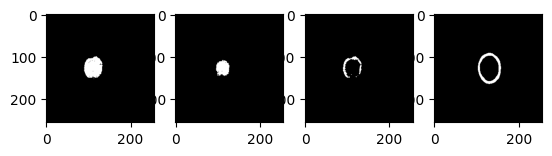

In [ ]:
fig, ax = plt.subplots(1,4)
ax[0].imshow(out3[0][:,:,0]>0.9, cmap='gray')  # Channel 0
ax[1].imshow(out3[0][:,:,1]>0.9, cmap='gray')  # Channel 1
# Channel 2
ax[2].imshow(out3[0][:,:,2]>0.9, cmap='gray')
ax[3].imshow(y_test[0][:,:,2]>0.9, cmap='gray')
# ax[4].imshow(y_test[0][:,:,1]>0.9, cmap='gray')

plt.show()